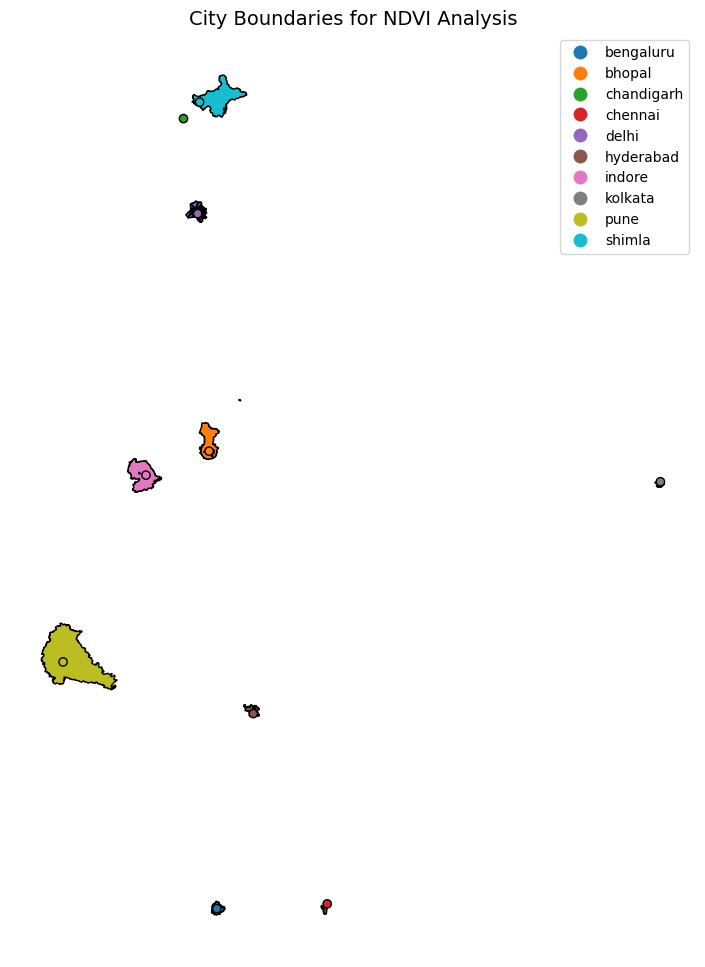

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

folder_path = "../geojson"  # adjust if needed
city_files = [f for f in os.listdir(folder_path) if f.endswith(".geojson")]

cities = []
for file in city_files:
    path = os.path.join(folder_path, file)
    gdf = gpd.read_file(path)
    gdf["city_name"] = file.replace(".geojson", "")
    cities.append(gdf)

# Combine all city boundaries
all_cities = gpd.GeoDataFrame(pd.concat(cities, ignore_index=True), crs=cities[0].crs)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
all_cities.plot(ax=ax, column='city_name', legend=True, cmap='tab10', edgecolor='black')
plt.title("City Boundaries for NDVI Analysis", fontsize=14)
plt.axis("off")
plt.show()


   system:index  NDVI       city    Year  Month
0  2018_01_01_0  0.36  Bengaluru  2018.0    1.0
1  2018_01_17_0  0.35  Bengaluru  2019.0    1.0
2  2019_01_01_0  0.40  Bengaluru  2020.0    1.0
3  2019_01_17_0  0.45     Bhopal  2018.0    1.0
4  2020_01_01_0  0.42     Bhopal  2019.0    1.0
system:index     object
NDVI            float64
city             object
Year            float64
Month           float64
dtype: object


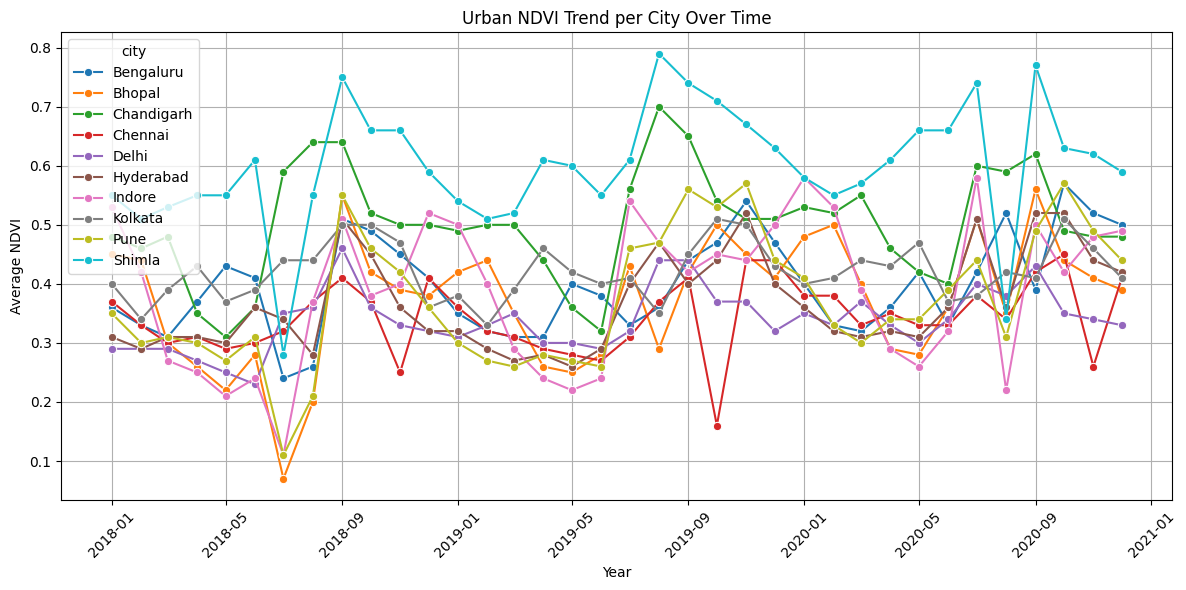

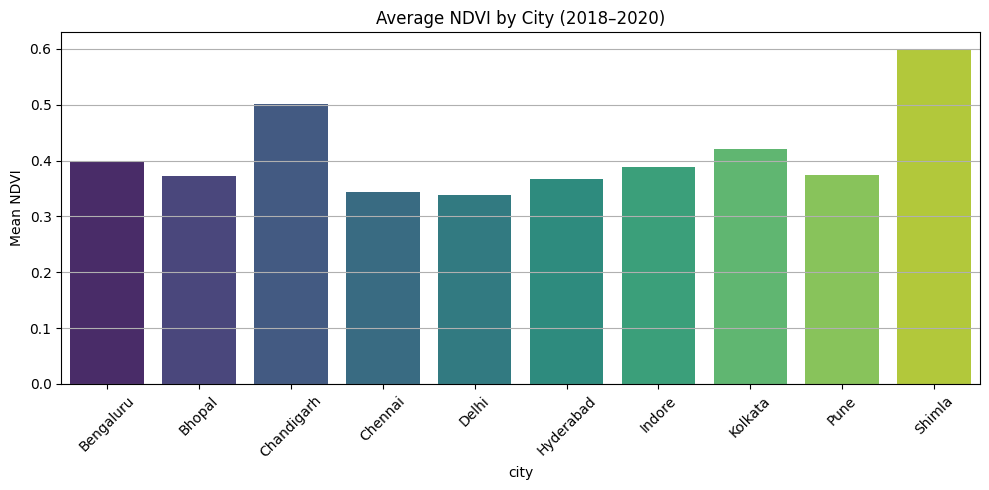

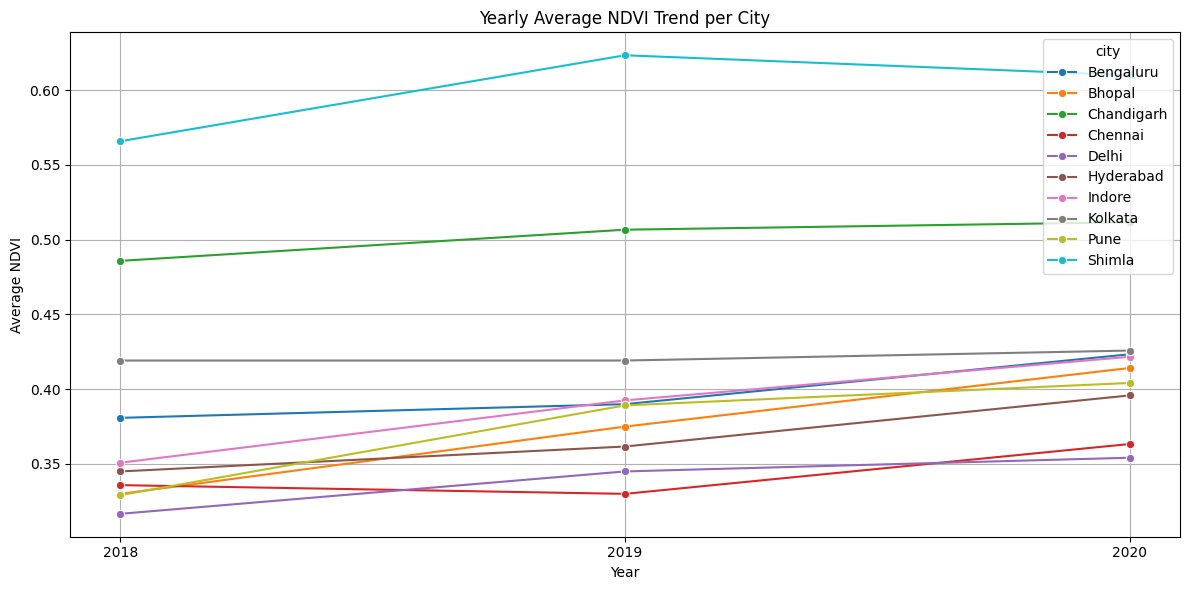

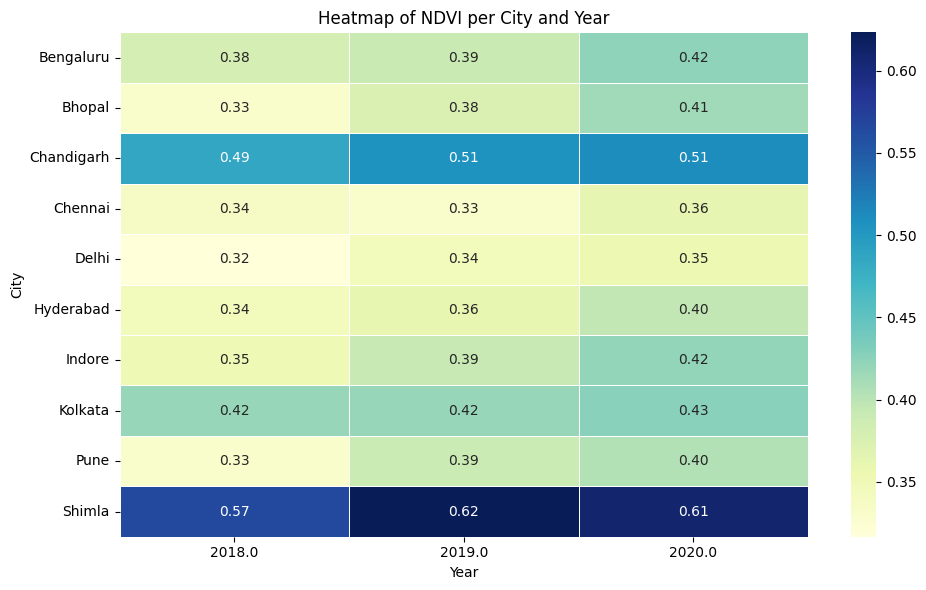

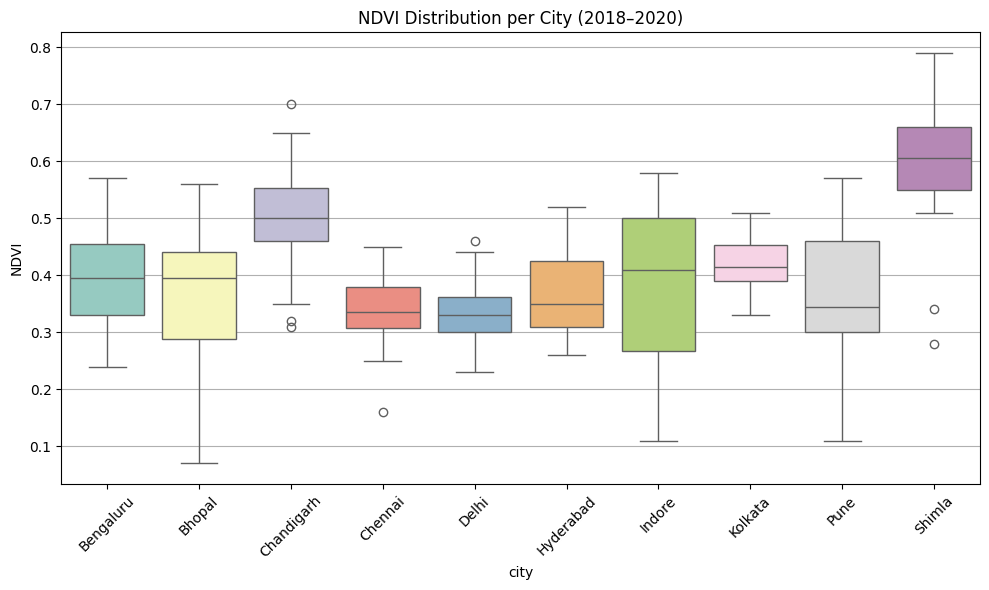

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: install seaborn if not already done
# !pip install seaborn

# Load your cleaned file
df = pd.read_csv(r"D:\urban_green_cover_project\Monthly_NDVI_Cities.csv")

# Optional: check data
print(df.head())
print(df.dtypes)

# Convert Year and Month into a single datetime object for time series
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# ========== 1. LINEPLOT: NDVI Trend per City Over Time ==========
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="NDVI", hue="city", marker="o")
plt.title("Urban NDVI Trend per City Over Time")
plt.ylabel("Average NDVI")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 2. BARPLOT: Average NDVI per City (All Years) ==========
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="city", y="NDVI", hue="city", estimator='mean', errorbar=None, palette="viridis", legend=False)


plt.title("Average NDVI by City (2018–2020)")
plt.ylabel("Mean NDVI")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ========== 3. LINEPLOT: Yearly Average NDVI Trend per City ==========
yearly_avg = df.groupby(['city', 'Year'])['NDVI'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_avg, x="Year", y="NDVI", hue="city", marker="o")
plt.title("Yearly Average NDVI Trend per City")
plt.ylabel("Average NDVI")
plt.xticks(yearly_avg['Year'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 4. HEATMAP: NDVI by City and Year ==========
pivot_table = yearly_avg.pivot(index="city", columns="Year", values="NDVI")


plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Heatmap of NDVI per City and Year")
plt.ylabel("City")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# ========== 5. BOXPLOT: NDVI Distribution per City ==========
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="city", y="NDVI", hue="city", palette="Set3", legend=False)
plt.title("NDVI Distribution per City (2018–2020)")
plt.ylabel("NDVI")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# Replace with your actual file path
file_path = r"D:\urban_green_cover_project\Urban_NDVI_2010_2023_Fixed.csv"

# Load the file
df = pd.read_csv(file_path)

# Show basic info
print(df.info())
print(df.head(10))
print(df['city'].unique())
print(df[['Year', 'Month']].drop_duplicates().sort_values(['Year', 'Month']).tail(12))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  1680 non-null   int64  
 1   Month         1680 non-null   int64  
 2   NDVI          1680 non-null   float64
 3   Year          1680 non-null   int64  
 4   city          1680 non-null   object 
 5   .geo          1680 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 78.9+ KB
None
   system:index  Month      NDVI  Year   city  \
0             0      1  0.153760  2010  Delhi   
1             1      2  0.184454  2010  Delhi   
2             2      3  0.197682  2010  Delhi   
3             3      4  0.202595  2010  Delhi   
4             4      5  0.180348  2010  Delhi   
5             5      6  0.222520  2010  Delhi   
6             6      7  0.269761  2010  Delhi   
7             7      8  0.203071  2010  Delhi   
8             8      9  0.335459  2010  D

✅ Cleaned CSV saved.


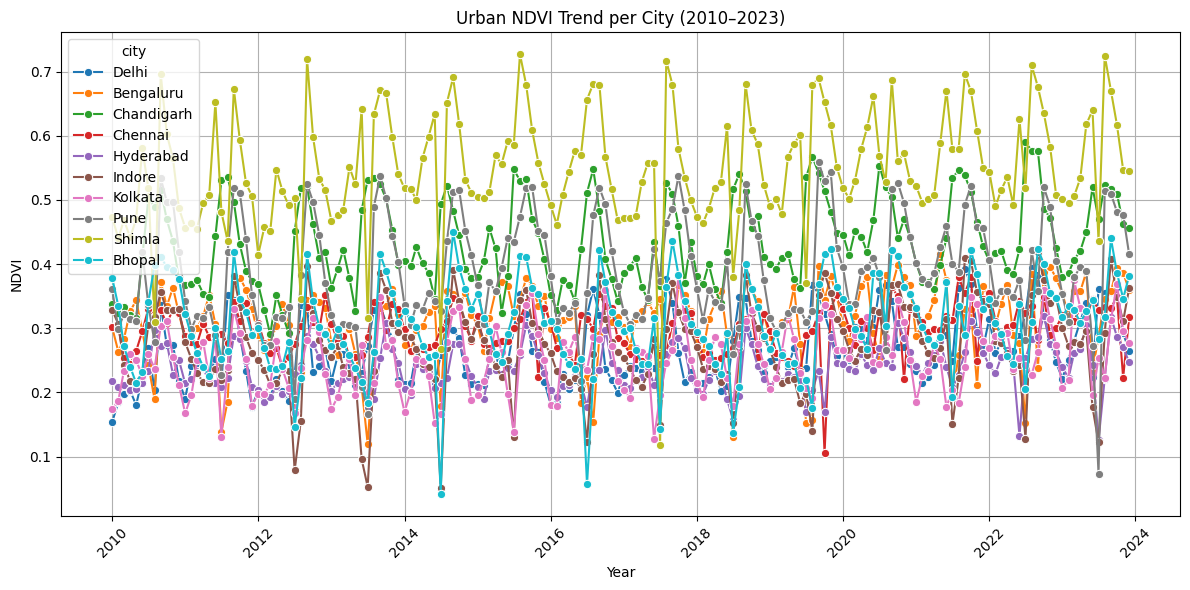

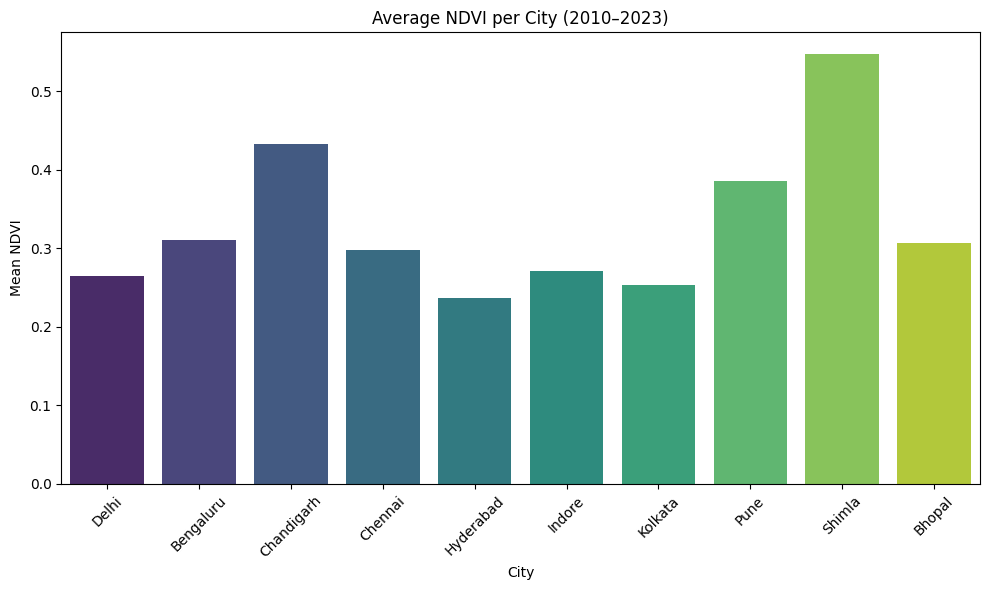

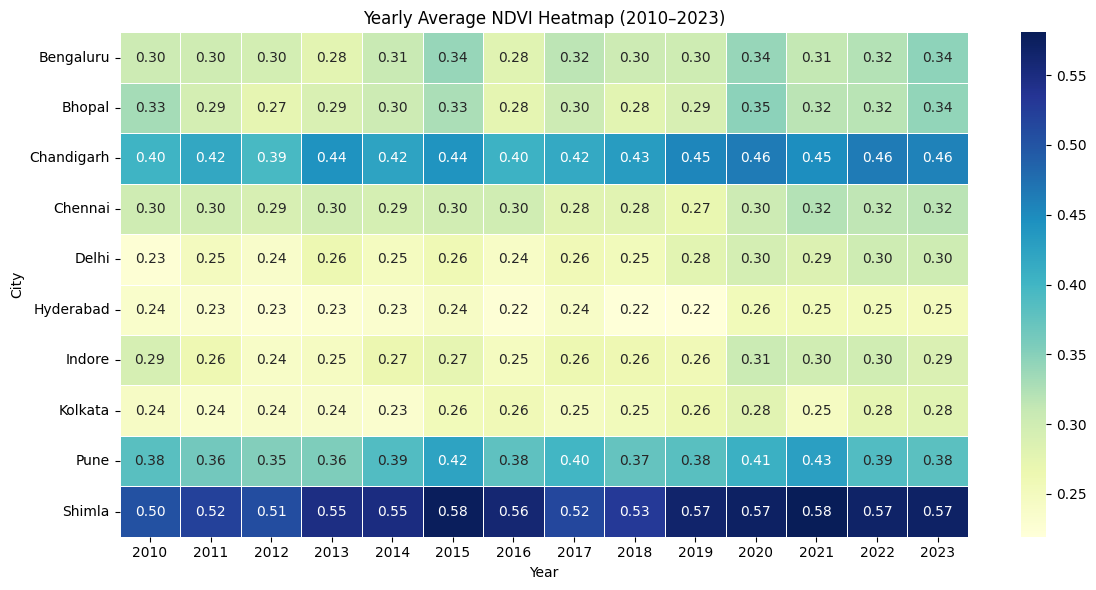

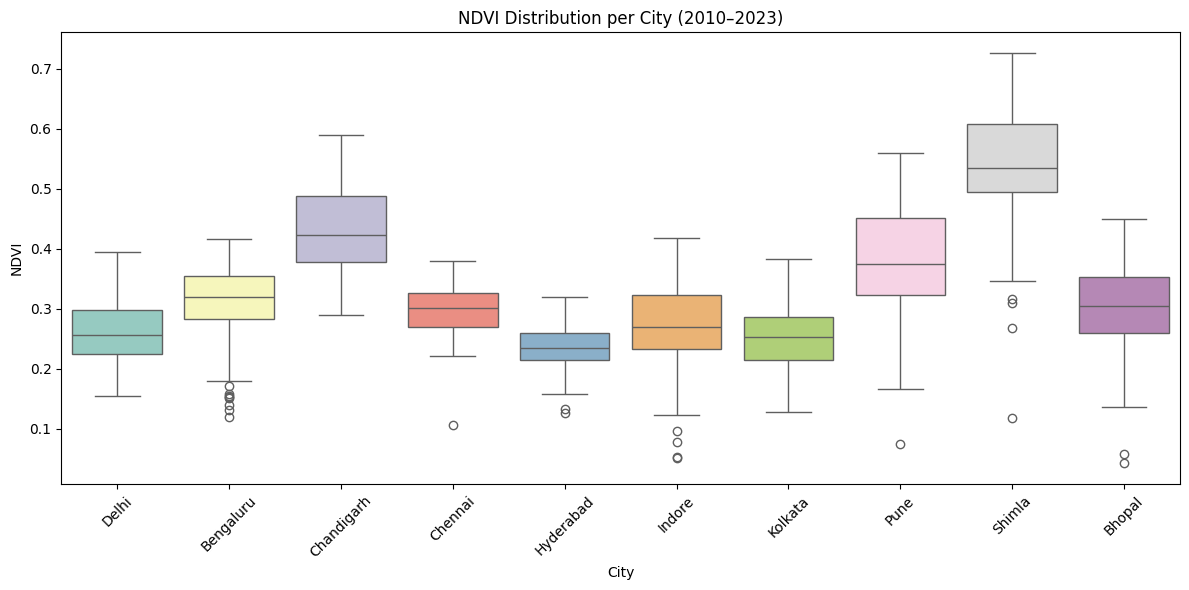

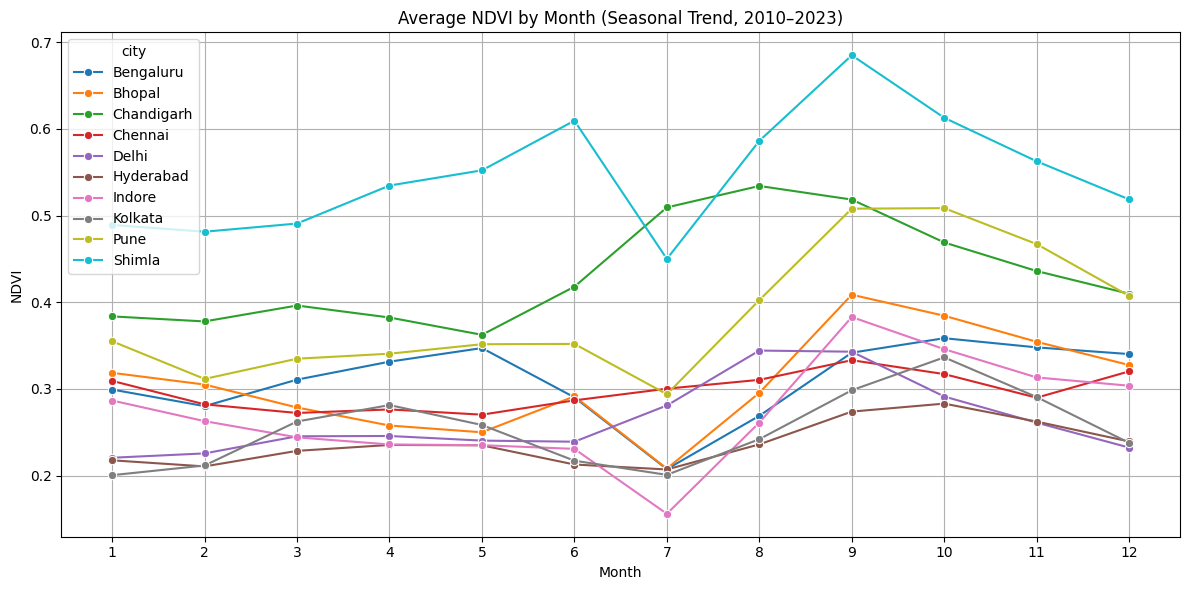

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== Step 1: Load and Clean ==========
df = pd.read_csv("D:/urban_green_cover_project/Urban_NDVI_2010_2023_Fixed.csv")

# Drop unnecessary columns
df = df.drop(columns=["system:index", ".geo"])

# Create 'Date' column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Save cleaned file
df.to_csv("D:/urban_green_cover_project/Monthly_NDVI_Cities_2010_2023.csv", index=False)
print("✅ Cleaned CSV saved.")

# ========== Step 2: Lineplot: NDVI Trend Over Time ==========
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="NDVI", hue="city", marker="o")
plt.title("Urban NDVI Trend per City (2010–2023)")
plt.ylabel("NDVI")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Step 3: Barplot: Average NDVI Per City ==========
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="city", y="NDVI", estimator='mean', errorbar=None, hue="city", palette="viridis", legend=False)
plt.title("Average NDVI per City (2010–2023)")
plt.ylabel("Mean NDVI")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== Step 4: Heatmap: NDVI by City and Year ==========
# Aggregate yearly average
yearly_avg = df.groupby(['city', 'Year'])['NDVI'].mean().reset_index()

# Pivot for heatmap
pivot_table = yearly_avg.pivot(index="city", columns="Year", values="NDVI")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Yearly Average NDVI Heatmap (2010–2023)")
plt.ylabel("City")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# ========== Step 5: Boxplot: NDVI Distribution per City ==========
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="city", y="NDVI", hue="city", palette="Set3", legend=False)
plt.title("NDVI Distribution per City (2010–2023)")
plt.ylabel("NDVI")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== Step 6: Monthly Trend (Seasonality) ==========
monthly_avg = df.groupby(['city', 'Month'])['NDVI'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x="Month", y="NDVI", hue="city", marker="o")
plt.title("Average NDVI by Month (Seasonal Trend, 2010–2023)")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import os

# Path to the folder you downloaded from Kaggle
folder_path = "D:/urban_green_cover_project/time_series_aqi_india_2010_2023"

# Initialize empty list
all_data = []

# Loop through each CSV in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        
        # Add filename as a new column (to keep track of which city/state if needed)
        df['source_file'] = filename
        
        all_data.append(df)

# Combine all into one dataframe
aqi_data = pd.concat(all_data, ignore_index=True)
print("✅ Combined shape:", aqi_data.shape)
